In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv")

In [3]:
data.rename(columns={'v1':'label','v2':'text'}, inplace=True)

In [4]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [5]:
data.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer = CountVectorizer()

In [14]:
X = vectorizer.fit_transform(data['text'])
Y = data['label']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Split data into train and test as we did alwasys
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, Y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
y_predict = model.predict(X_test)

In [22]:
accuracy_score(Y_test, y_predict)

0.9806173725771715

In [23]:
matrix = confusion_matrix(Y_test, y_predict, normalize='all')

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
display = ConfusionMatrixDisplay(matrix)

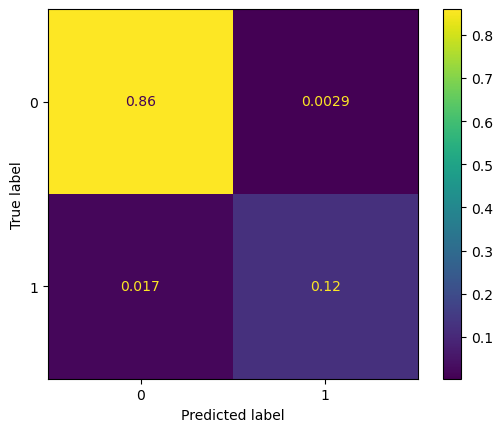

In [26]:
display.plot()

In [27]:
matrix = confusion_matrix(Y_test, y_predict)

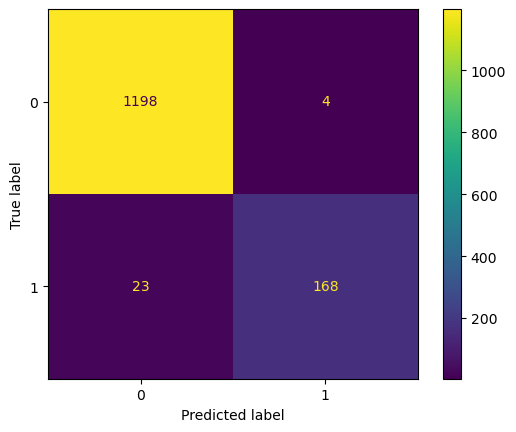

In [28]:
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [29]:
message = "Our company is seeking passionate YouTube channel owners who are interested in promoting our new software :Corel Video Editor.After admiring your creative content on your channel, we believe that partnering with you can lead to mutual success.If you are interested in collaborating with us, please respond to this email and we will provide you with the contract details and the software trailer."

In [30]:
message_vector = vectorizer.transform([message])

In [31]:
result = model.predict(message_vector)

In [32]:
# Spam 1 , if ) not spam (Ham)
result

array([1])

In [33]:
# NOT SPAM
message = "The Cryptomus Team is in touch! My name is Robert and I’m reaching out to you with an exciting offer for your TFD YouTube channel.The main product of Cryptomus is a payment gateway that helps businesses receive payments from all over the world. However, Cryptomus isn’t just a cryptocurrency payment gateway. It is a full-service ecosystem for payments, buying, storing, exchanging, and selling cryptocurrencies.Our Payment Gateway is a perfect solution for online businesses. It allows them to receive payments without any difficulties and without any hidden commissions.We believe that your audience will find our products highly beneficial! Developers that watch your videos will be interested to try our features in their work journey.Let me know your thoughts! Looking forward to hearing from you."

In [34]:
message_vector = vectorizer.transform([message])

In [35]:
result = model.predict(message_vector)

In [36]:
result[0]

1

In [37]:
message = "It's been over a week since your GIP experience ended. Hopefully you were able to enjoy some more Japanese culture before heading home."

In [38]:
message_vector = vectorizer.transform([message])

In [39]:
result = model.predict(message_vector)

In [40]:
result[0]

0